In [1]:
import cv2
import numpy as np
from PIL import Image

def detect_lines_opencv(image_path, min_height=20):
    """
    Phát hiện dòng chữ viết tay từ ảnh bằng kỹ thuật contour.
    Trả về danh sách ảnh từng dòng.
    """
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Làm mờ và nhị phân ảnh
    blurred = cv2.GaussianBlur(gray, (5, 5), 0)
    _, binary = cv2.threshold(blurred, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

    # Giãn ảnh theo chiều ngang để nối các ký tự trong cùng dòng
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (30, 3))
    dilated = cv2.dilate(binary, kernel, iterations=1)

    # Tìm contour
    contours, _ = cv2.findContours(dilated, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Sắp xếp theo tọa độ Y (trên xuống dưới)
    bounding_boxes = [cv2.boundingRect(c) for c in contours]
    bounding_boxes = sorted(bounding_boxes, key=lambda x: x[1])

    lines = []
    for x, y, w, h in bounding_boxes:
        if h >= min_height:
            roi = image[y:y+h, x:x+w]
            lines.append(Image.fromarray(roi))

    return lines

In [2]:
# --- Hiển thị các dòng sau khi tách ---
import matplotlib.pyplot as plt

def preview_detected_lines(lines, save=False, prefix="line_"):
    """
    Hiển thị các dòng đã tách và lưu ảnh nếu cần.
    lines: danh sách ảnh PIL từ detect_lines_opencv()
    save: nếu True sẽ lưu từng dòng ra file.
    prefix: tiền tố tên file nếu lưu.
    """
    print(f"Phát hiện {len(lines)} dòng.")
    plt.figure(figsize=(10, len(lines) * 2))

    for i, line in enumerate(lines):
        plt.subplot(len(lines), 1, i + 1)
        plt.imshow(line)
        plt.axis("off")
        plt.title(f"Dòng {i+1}")

        if save:
            line.save(f"{prefix}{i+1}.png")

    plt.tight_layout()
    plt.show()

Phát hiện 3 dòng.


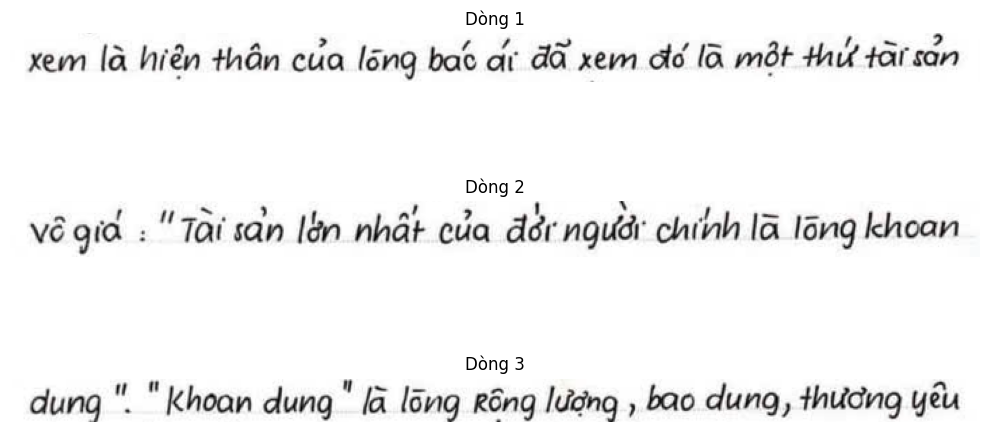

In [3]:
lines = detect_lines_opencv("C:/Users/ADMIN/Documents/data_line/c/data/24.jpg")
preview_detected_lines(lines)